# Decision Tree

## What are Decision Trees?

- A Decision Tree is a supervised learning algorithm. 
- Unlike other supervised learning algorithm, the decision tree algorithm can be used to solve regression and classification problems.
- The goal of using a Decision Tree is to create a training model that can be used to predict the class or value of the response variable by learning simple decision rules from training data
- The type of tree we will be using is a classification tree, where the outcome is binary in nature (Stroke vs No Stroke)

## How Decision Trees Work

- Decision trees start their splitting process starting from the root node, down to the leaf/terminal nodes
- Each node in the tree acts as a test case for some condition, with its left and right edge either fulfilling or failing the condition
- On each node of the decision tree, we try to form a condition on the features to separate the classes contained in the dataset to the fullest purity
- The splitting process continues, until the specified tree depth is reached, and leaf/Terminal nodes classify the data points into classes through probability as part of the prediction

## Essential Libraries

We begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Importing required models and functions from sklearn

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

## Import datasets

### 1. Random Sampling

In [3]:
#Importing randomly sampled data
train = pd.read_csv("data/train.csv", index_col=0).loc[:, 'gender':]

#Convert relevant columns into categorical
for col in ['hypertension', 'heart_disease', 'ever_married', 'work_type', 
            'Residence_type', 'smoking_status', 'stroke']:
    train[col] = train[col].astype('category')

train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2504,0,44.0,0,0,0,4,1,127.21,29.8,2,0
3389,0,31.0,0,0,1,4,0,75.82,29.1,1,0
3444,0,41.0,0,0,1,4,1,103.79,28.6,1,0
2077,1,74.0,0,0,1,4,0,65.28,28.2,1,0
4761,0,76.0,1,0,1,5,1,78.68,23.3,1,0


### 2. SMOTE

In [4]:
#Importing SMOTE oversampled data
sme_train = pd.read_csv("data/SMOTEoversampling_train.csv", index_col=0).loc[:, 'gender':]

#Convert relevant columns into categorical
for col in ['hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']:
    sme_train[col] = sme_train[col].astype('category')

sme_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,44.0,0,0,0,4,1,127.21,29.8,2,0
1,0,31.0,0,0,1,4,0,75.82,29.1,1,0
2,0,41.0,0,0,1,4,1,103.79,28.6,1,0
3,1,74.0,0,0,1,4,0,65.28,28.2,1,0
4,0,76.0,1,0,1,5,1,78.68,23.3,1,0


### 3. SMOTETEENN

In [5]:
#Importing SMOTETEENN oversampled data
smn_train = pd.read_csv("data/SMOTEENNoversampling_train.csv", index_col=0).loc[:, 'gender':]

#Convert relevant columns into categorical
for col in ['hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']:
    smn_train[col] = smn_train[col].astype('category')

smn_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,44.0,0,0,0,4,1,127.21,29.8,2,0
1,0,31.0,0,0,1,4,0,75.82,29.1,1,0
2,0,41.0,0,0,1,4,1,103.79,28.6,1,0
3,1,74.0,0,0,1,4,0,65.28,28.2,1,0
4,0,76.0,1,0,1,5,1,78.68,23.3,1,0


### 4. ADASYN

In [6]:
#Importing ADASYN oversampled data
ada_train = pd.read_csv("data/ADASYNoversampling_train.csv", index_col=0).loc[:, 'gender':]

#Convert relevant columns into categorical
for col in ['hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']:
    ada_train[col] = ada_train[col].astype('category')

ada_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,44.0,0,0,0,4,1,127.21,29.8,2,0
1,0,31.0,0,0,1,4,0,75.82,29.1,1,0
2,0,41.0,0,0,1,4,1,103.79,28.6,1,0
3,1,74.0,0,0,1,4,0,65.28,28.2,1,0
4,0,76.0,1,0,1,5,1,78.68,23.3,1,0


## Importing and Handling Test data

In [7]:
test = pd.read_csv("data/test.csv", index_col=0).loc[:, 'gender':]

#Convert relevant columns into categorical
for col in ['hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']:
    test[col] = test[col].astype('category')
    
test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1281,1,8.0,0,0,0,1,1,88.83,18.5,1,0
1033,1,34.0,0,0,0,4,1,108.47,30.4,2,0
4910,0,34.0,0,0,0,4,0,69.06,29.0,2,0
2335,1,48.0,0,0,1,4,0,106.74,33.7,0,0
607,0,1.8,0,0,0,1,1,102.34,17.0,1,0


In [8]:
y_test = test['stroke']
x_test = test.drop(['stroke'], axis = 1) # Remove the response variable

## Prediction using different datasets

### Function to record metrics for train and test dataset

In [9]:
def recmetrics(accuracy, TP, FP, TN, FN, table):
    #List to store performance evaluation measures to be appended to table
    evlist = []  

    if (TP+FP) == 0:
        precision = 0.0
    else:
        precision = TP/(TP+FP)
        
    if(TP+FN) == 0:
        sensitivity = 0.0
    else:
        sensitivity = TP/(TP+FN)
        
    if(TN+FP) == 0:
        specificity = 0.0
    else:
        specificity = TN/(TN+FP)
        
    if(precision + sensitivity) == 0:
        f1_score = 0
    else:
        f1_score = 2*(precision*sensitivity)/(precision+sensitivity)   


    #Store data into list
    evlist.append(accuracy)
    evlist.append(precision)
    evlist.append(sensitivity)
    evlist.append(specificity)
    evlist.append(f1_score)    
    evlist = pd.DataFrame(evlist)
    
    #Concatenate data as column
    table = pd.concat([table, evlist], axis = 1)
    
    return table

### Dataframes to store performance metrics for train and test data

In [10]:
#Creates empty dataframe for future storage of performance evaluation measures
train_table = pd.DataFrame()
test_table = pd.DataFrame()

### Prediction using Randomly Sampled Dataset

#### Train and Plot the Decision Tree (Train)

[Text(669.6, 1141.5600000000002, 'age <= 67.5\ngini = 0.087\nsamples = 4087\nvalue = [3900, 187]\nclass = N'),
 Text(334.8, 815.4000000000001, 'age <= 56.5\ngini = 0.041\nsamples = 3410\nvalue = [3339, 71]\nclass = N'),
 Text(167.4, 489.24, 'age <= 37.5\ngini = 0.021\nsamples = 2797\nvalue = [2768, 29]\nclass = N'),
 Text(83.7, 163.07999999999993, 'gini = 0.002\nsamples = 1619\nvalue = [1617, 2]\nclass = N'),
 Text(251.10000000000002, 163.07999999999993, 'gini = 0.045\nsamples = 1178\nvalue = [1151, 27]\nclass = N'),
 Text(502.20000000000005, 489.24, 'smoking_status <= 0.5\ngini = 0.128\nsamples = 613\nvalue = [571, 42]\nclass = N'),
 Text(418.5, 163.07999999999993, 'gini = 0.265\nsamples = 178\nvalue = [150, 28]\nclass = N'),
 Text(585.9, 163.07999999999993, 'gini = 0.062\nsamples = 435\nvalue = [421, 14]\nclass = N'),
 Text(1004.4000000000001, 815.4000000000001, 'smoking_status <= 0.5\ngini = 0.284\nsamples = 677\nvalue = [561, 116]\nclass = N'),
 Text(837.0, 489.24, 'age <= 73.5\ngi

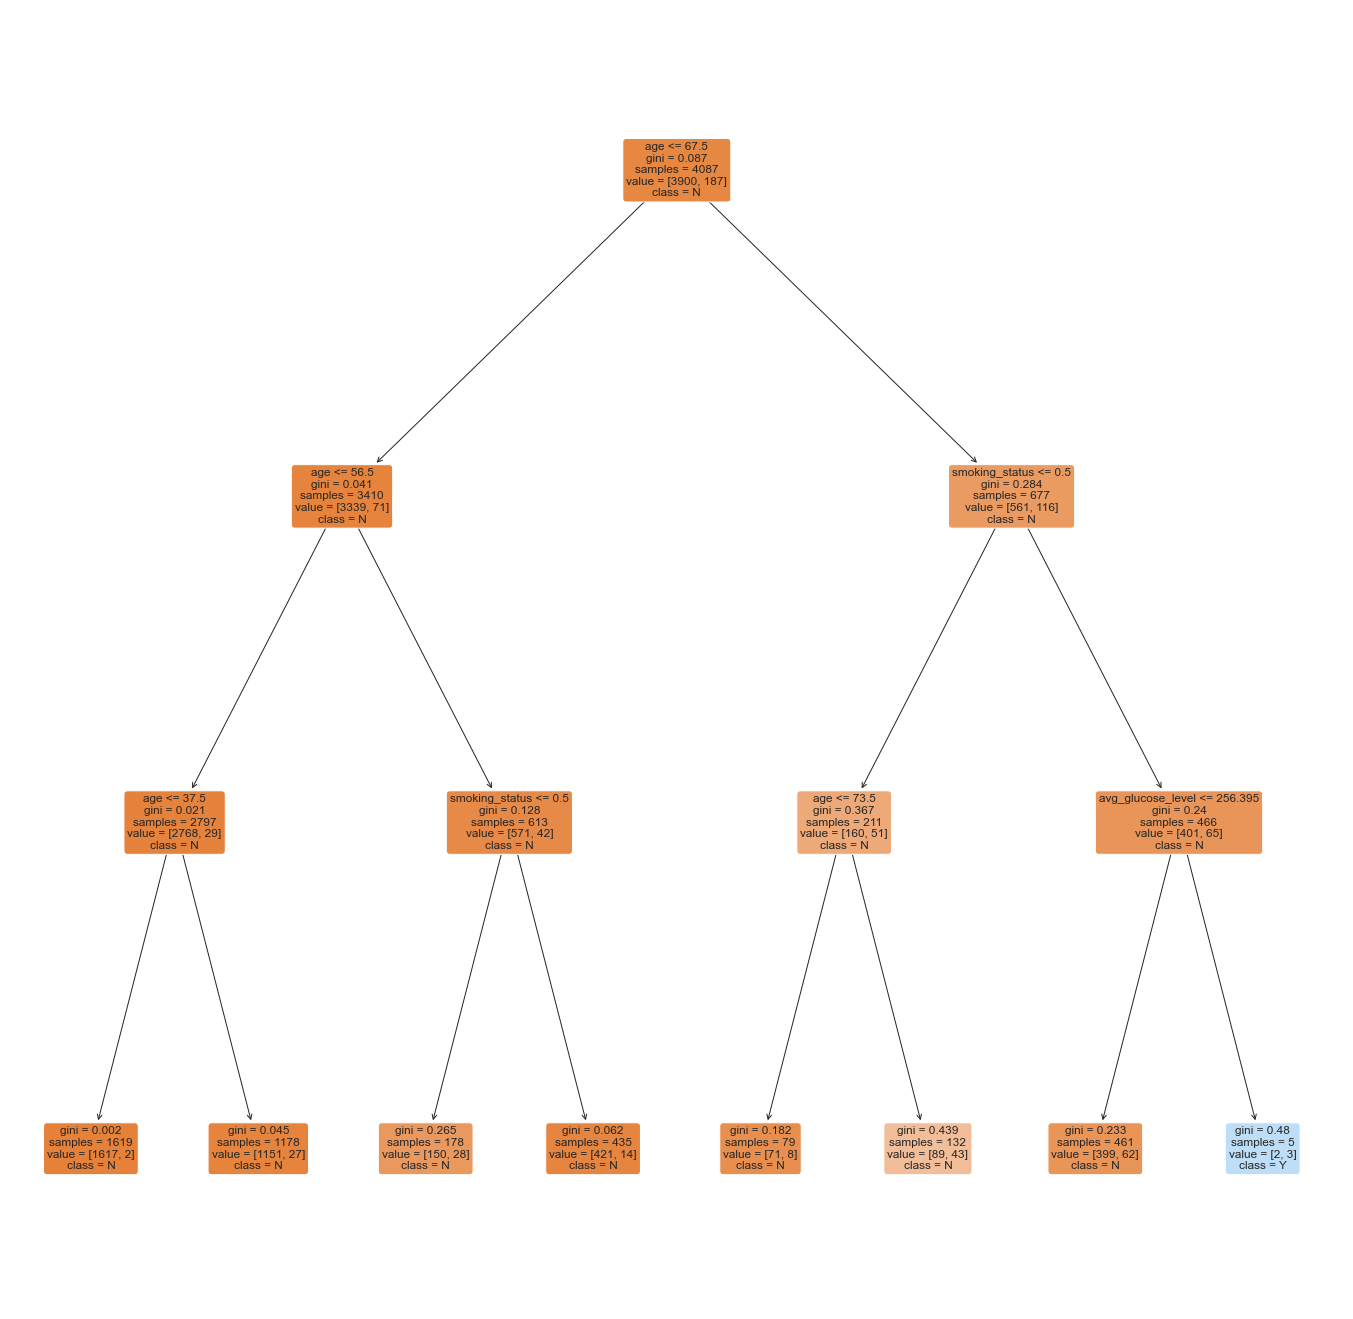

In [11]:
#Assign x and y values
y_train = train['stroke']
x_train = train.drop(['stroke'], axis = 1) # Remove the response variable

# Decision Tree using Train Data
dectree1 = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree1.fit(x_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=x_train.columns, 
          class_names=["N","Y"])

#### Predicting and analyse the Response using trained decision tree (Train)

Train Data
Accuracy  :	 0.9544898458527037

TPR Train :	 0.016042780748663103
TNR Train :	 0.9994871794871795

FPR Train :	 0.0005128205128205128
FNR Train :	 0.983957219251337


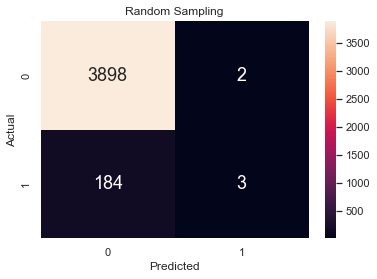

In [12]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree1.predict(x_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree1.score(x_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
accuracy = dectree1.score(x_train, y_train)
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.title('Random Sampling')
plt.xlabel('Predicted')
plt.ylabel('Actual')

train_table = recmetrics(accuracy, tpTrain, fpTrain, tnTrain, fnTrain, train_table)

#### Predicting and analyse the Response using trained decision tree (Test)

Test Data
Accuracy  :	 0.9393346379647749

TPR Test :	 0.0
TNR Test :	 1.0

FPR Test :	 0.0
FNR Test :	 1.0


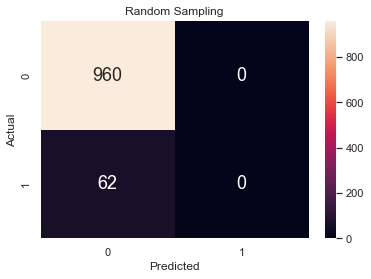

In [13]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree1.predict(x_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree1.score(x_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
accuracy = dectree1.score(x_test, y_test)
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.title('Random Sampling')
plt.xlabel('Predicted')
plt.ylabel('Actual')

test_table = recmetrics(accuracy, tpTest, fpTest, tnTest, fnTest, test_table)

### Prediction using SMOTE Dataset

#### Plotting the Decision Tree (Train)

[Text(669.6, 1141.5600000000002, 'age <= 54.014\ngini = 0.5\nsamples = 7800\nvalue = [3900, 3900]\nclass = N'),
 Text(334.8, 815.4000000000001, 'smoking_status <= 0.5\ngini = 0.23\nsamples = 3039\nvalue = [2637, 402]\nclass = N'),
 Text(167.4, 489.24, 'age <= 43.014\ngini = 0.488\nsamples = 535\nvalue = [309, 226]\nclass = N'),
 Text(83.7, 163.07999999999993, 'gini = 0.278\nsamples = 216\nvalue = [180, 36]\nclass = N'),
 Text(251.10000000000002, 163.07999999999993, 'gini = 0.482\nsamples = 319\nvalue = [129, 190]\nclass = Y'),
 Text(502.20000000000005, 489.24, 'age <= 49.009\ngini = 0.131\nsamples = 2504\nvalue = [2328, 176]\nclass = N'),
 Text(418.5, 163.07999999999993, 'gini = 0.073\nsamples = 2158\nvalue = [2076, 82]\nclass = N'),
 Text(585.9, 163.07999999999993, 'gini = 0.396\nsamples = 346\nvalue = [252, 94]\nclass = N'),
 Text(1004.4000000000001, 815.4000000000001, 'smoking_status <= 0.5\ngini = 0.39\nsamples = 4761\nvalue = [1263, 3498]\nclass = Y'),
 Text(837.0, 489.24, 'work_t

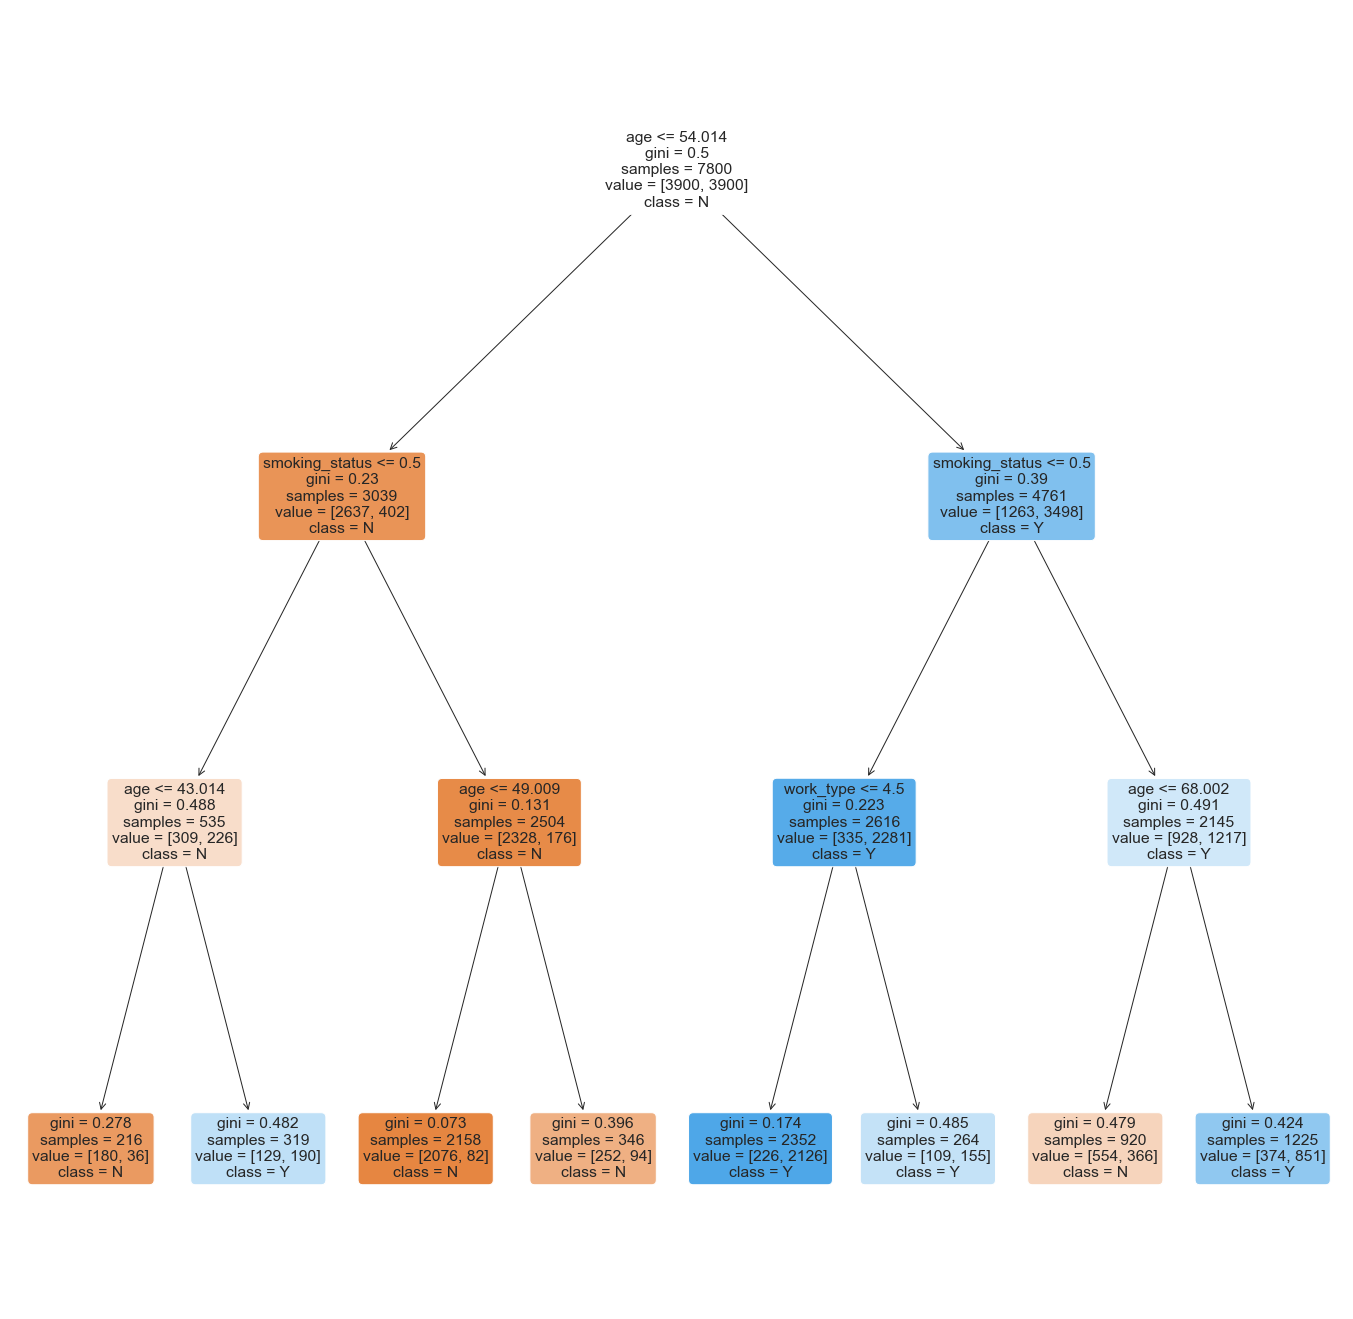

In [14]:
#Assign x and y values
y_train = sme_train['stroke']
x_train = sme_train.drop(['stroke'], axis = 1) # Remove the response variable

# Decision Tree using Train Data
dectree2 = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree2.fit(x_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree2, filled=True, rounded=True, 
          feature_names=x_train.columns, 
          class_names=["N","Y"])

#### Predicting and analysing the Response using trained decision tree (Train)

Train Data
Accuracy  :	 0.8184615384615385

TPR Train :	 0.8517948717948718
TNR Train :	 0.7851282051282051

FPR Train :	 0.21487179487179486
FNR Train :	 0.1482051282051282


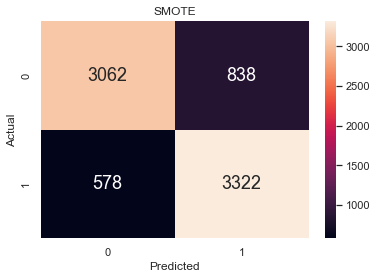

In [15]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree2.predict(x_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree2.score(x_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
accuracy = dectree2.score(x_train, y_train)
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.title('SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')

train_table = recmetrics(accuracy, tpTrain, fpTrain, tnTrain, fnTrain, train_table)

#### Predicting and analysing the Response using trained decision tree (Test)

Test Data
Accuracy  :	 0.7700587084148728

TPR Test :	 0.6935483870967742
TNR Test :	 0.775

FPR Test :	 0.225
FNR Test :	 0.3064516129032258


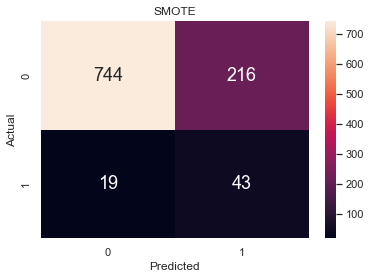

In [16]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree2.predict(x_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree2.score(x_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
accuracy = dectree2.score(x_test, y_test)
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.title('SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')

test_table = recmetrics(accuracy, tpTest, fpTest, tnTest, fnTest, test_table)

### Prediction using SMOTEENN Dataset

#### Plotting the Decision Tree (Train)

[Text(669.6, 1141.5600000000002, 'age <= 54.014\ngini = 0.5\nsamples = 7792\nvalue = [3892, 3900]\nclass = Y'),
 Text(334.8, 815.4000000000001, 'smoking_status <= 0.5\ngini = 0.23\nsamples = 3036\nvalue = [2634, 402]\nclass = N'),
 Text(167.4, 489.24, 'age <= 43.014\ngini = 0.488\nsamples = 534\nvalue = [308, 226]\nclass = N'),
 Text(83.7, 163.07999999999993, 'gini = 0.278\nsamples = 216\nvalue = [180, 36]\nclass = N'),
 Text(251.10000000000002, 163.07999999999993, 'gini = 0.481\nsamples = 318\nvalue = [128, 190]\nclass = Y'),
 Text(502.20000000000005, 489.24, 'age <= 49.009\ngini = 0.131\nsamples = 2502\nvalue = [2326, 176]\nclass = N'),
 Text(418.5, 163.07999999999993, 'gini = 0.073\nsamples = 2156\nvalue = [2074, 82]\nclass = N'),
 Text(585.9, 163.07999999999993, 'gini = 0.396\nsamples = 346\nvalue = [252, 94]\nclass = N'),
 Text(1004.4000000000001, 815.4000000000001, 'smoking_status <= 0.5\ngini = 0.389\nsamples = 4756\nvalue = [1258, 3498]\nclass = Y'),
 Text(837.0, 489.24, 'work_

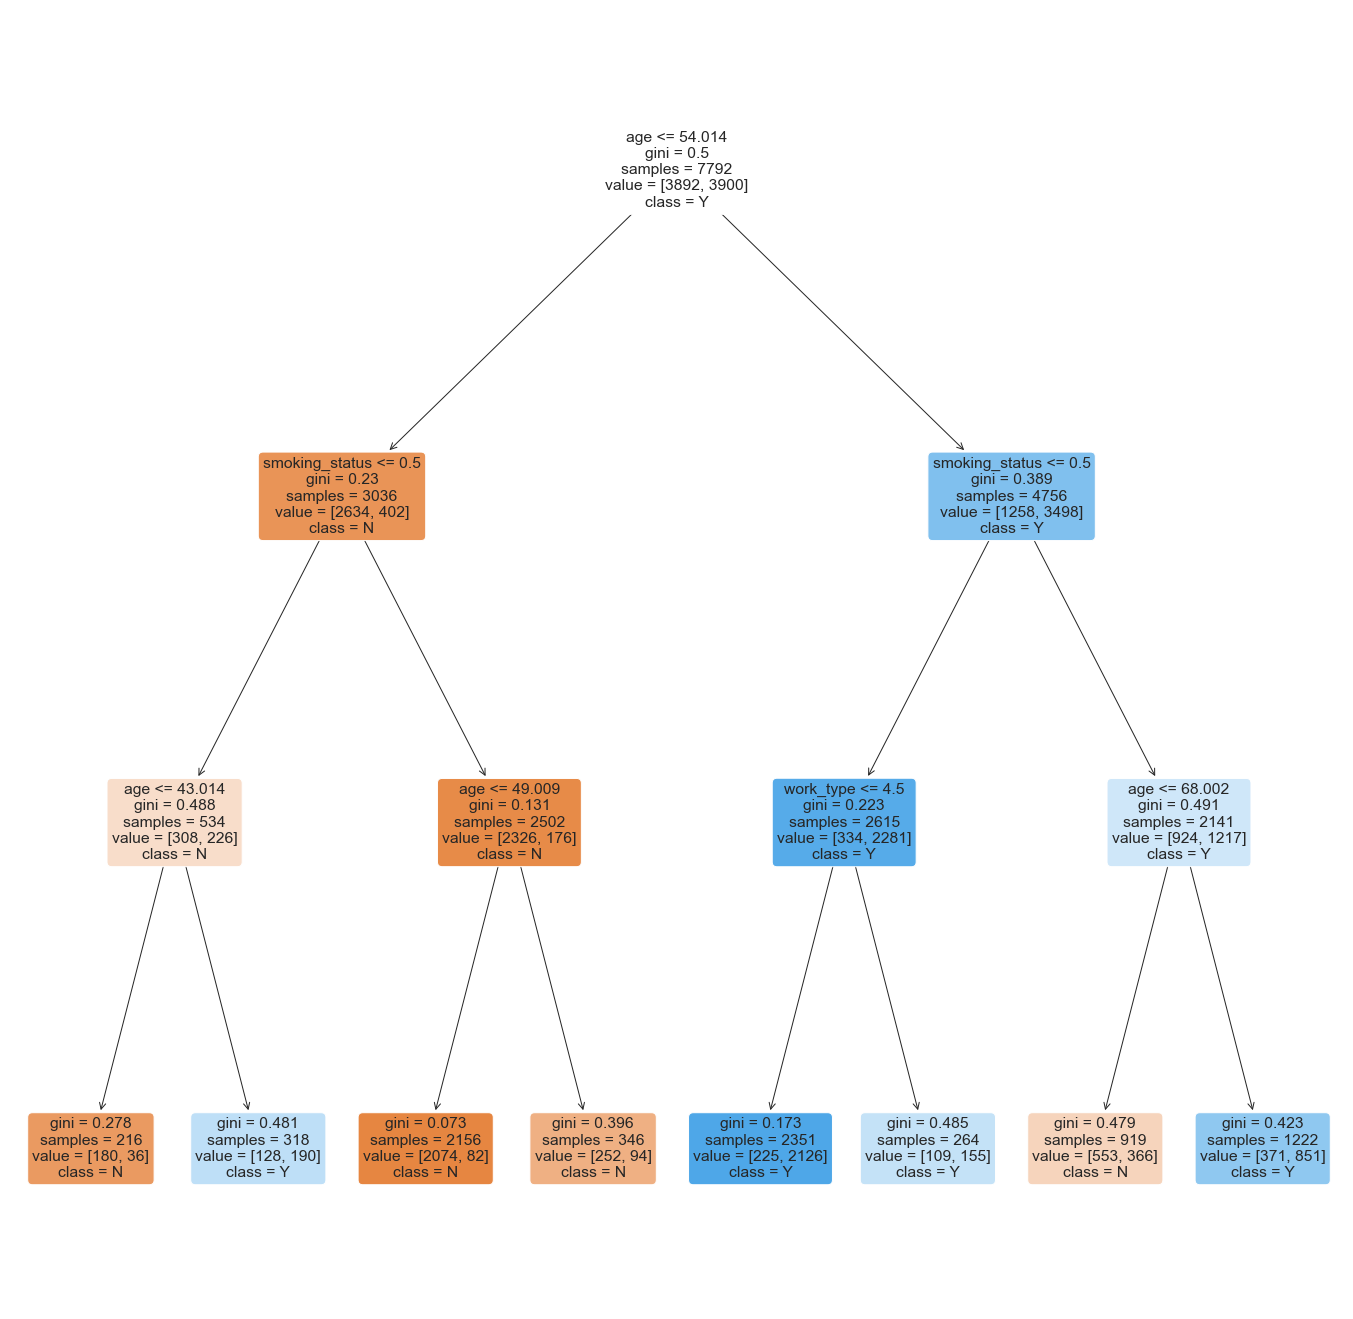

In [17]:
#Assign x and y values
y_train = smn_train['stroke']
x_train = smn_train.drop(['stroke'], axis = 1) # Remove the response variable

# Decision Tree using Train Data
dectree3 = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree3.fit(x_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree3, filled=True, rounded=True, 
          feature_names=x_train.columns, 
          class_names=["N","Y"])

#### Predicting and analysing the Response using trained decision tree (Train)

Train Data
Accuracy  :	 0.8189168377823408

TPR Train :	 0.8517948717948718
TNR Train :	 0.7859712230215827

FPR Train :	 0.21402877697841727
FNR Train :	 0.1482051282051282


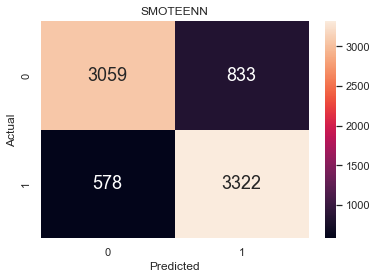

In [18]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree3.predict(x_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree3.score(x_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
accuracy = dectree3.score(x_train, y_train)
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.title('SMOTEENN')
plt.xlabel('Predicted')
plt.ylabel('Actual')

train_table = recmetrics(accuracy, tpTrain, fpTrain, tnTrain, fnTrain, train_table)

#### Predicting and analysing the Response using trained decision tree (Test)

Test Data
Accuracy  :	 0.7700587084148728

TPR Test :	 0.6935483870967742
TNR Test :	 0.775

FPR Test :	 0.225
FNR Test :	 0.3064516129032258


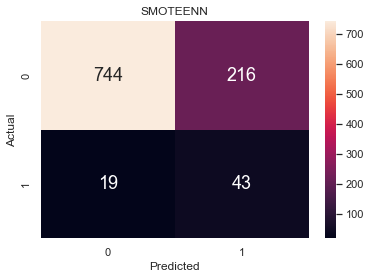

In [19]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree3.predict(x_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree3.score(x_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
accuracy = dectree3.score(x_train, y_train)
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.title('SMOTEENN')
plt.xlabel('Predicted')
plt.ylabel('Actual')

test_table = recmetrics(accuracy, tpTest, fpTest, tnTest, fnTest, test_table)

### Prediction using ADASYN Dataset

#### Plotting the Decision Tree (Train)

[Text(669.6, 1141.5600000000002, 'age <= 51.029\ngini = 0.5\nsamples = 7802\nvalue = [3900, 3902]\nclass = Y'),
 Text(334.8, 815.4000000000001, 'age <= 37.5\ngini = 0.016\nsamples = 2461\nvalue = [2441, 20]\nclass = N'),
 Text(167.4, 489.24, 'age <= 1.36\ngini = 0.002\nsamples = 1619\nvalue = [1617, 2]\nclass = N'),
 Text(83.7, 163.07999999999993, 'gini = 0.033\nsamples = 59\nvalue = [58, 1]\nclass = N'),
 Text(251.10000000000002, 163.07999999999993, 'gini = 0.001\nsamples = 1560\nvalue = [1559, 1]\nclass = N'),
 Text(502.20000000000005, 489.24, 'smoking_status <= 0.5\ngini = 0.042\nsamples = 842\nvalue = [824, 18]\nclass = N'),
 Text(418.5, 163.07999999999993, 'gini = 0.106\nsamples = 143\nvalue = [135, 8]\nclass = N'),
 Text(585.9, 163.07999999999993, 'gini = 0.028\nsamples = 699\nvalue = [689, 10]\nclass = N'),
 Text(1004.4000000000001, 815.4000000000001, 'smoking_status <= 0.5\ngini = 0.397\nsamples = 5341\nvalue = [1459, 3882]\nclass = Y'),
 Text(837.0, 489.24, 'work_type <= 3.0\n

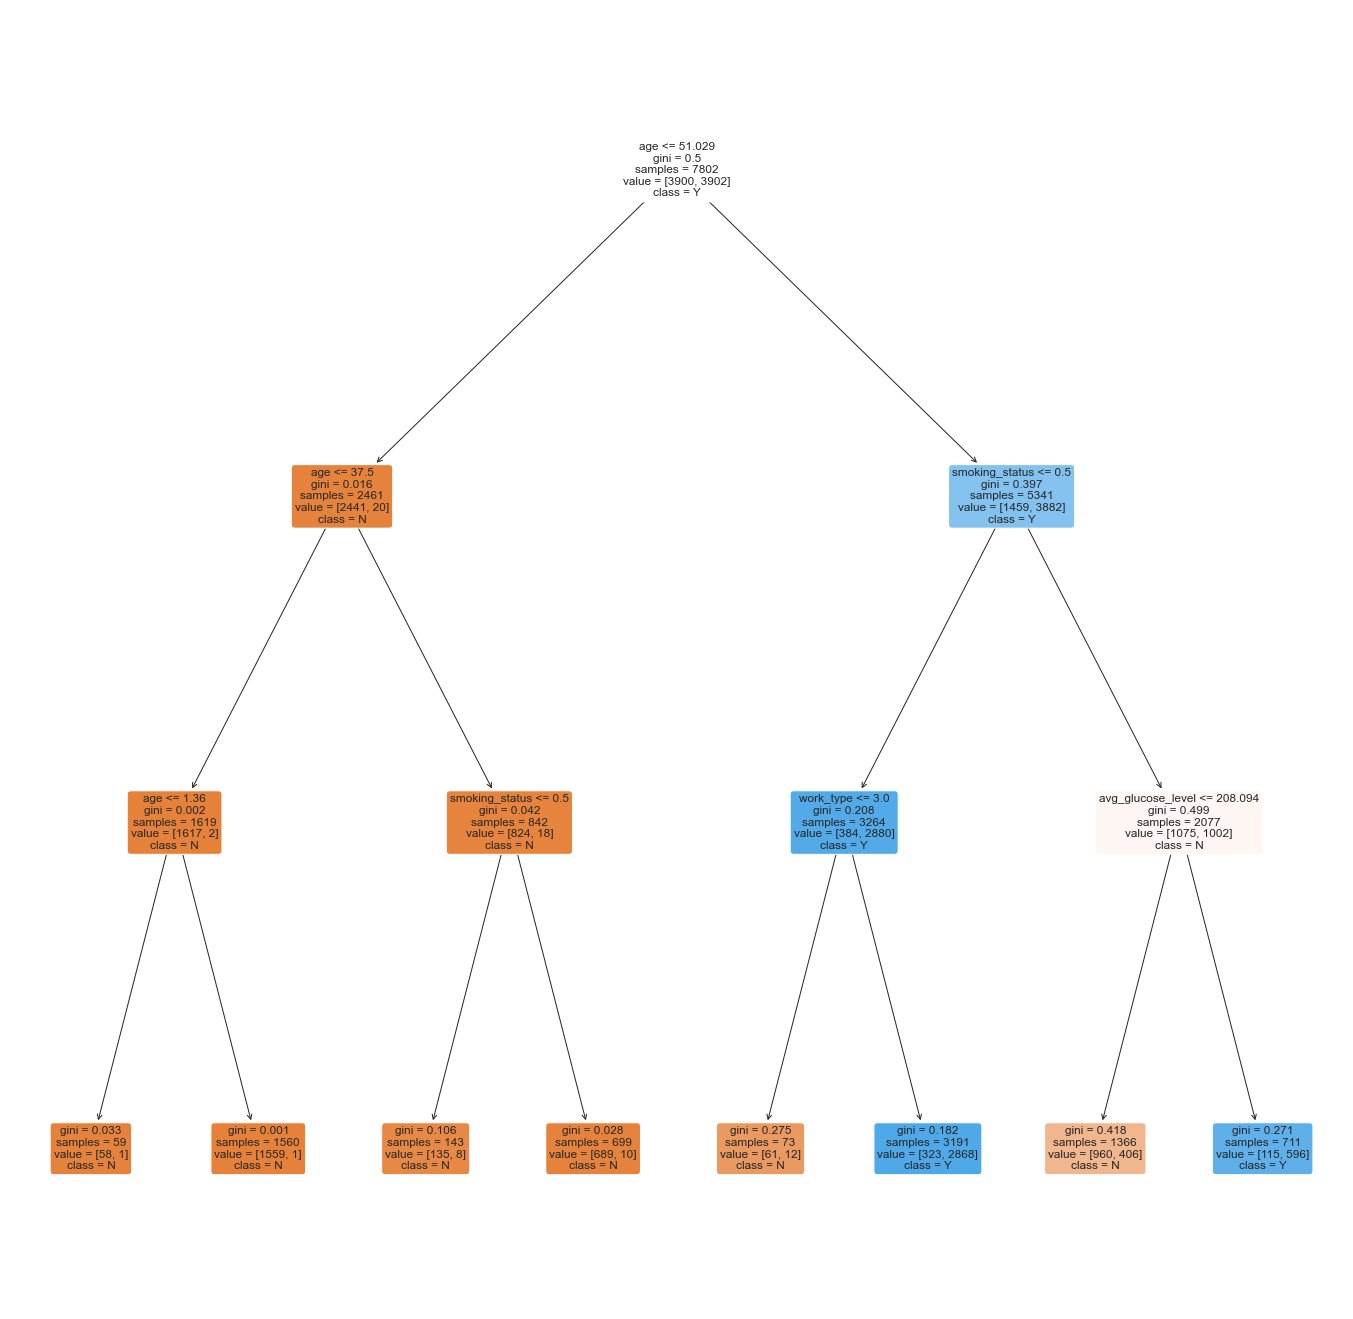

In [20]:
#Assign x and y values
y_train = ada_train['stroke']
x_train = ada_train.drop(['stroke'], axis = 1) # Remove the response variable

# Decision Tree using Train Data
dectree4 = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree4.fit(x_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree4, filled=True, rounded=True, 
          feature_names=x_train.columns, 
          class_names=["N","Y"])

#### Predicting and analysing the Response using trained decision tree (Train)

Train Data
Accuracy  :	 0.8877210971545757

TPR Train :	 0.8877498718605843
TNR Train :	 0.8876923076923077

FPR Train :	 0.1123076923076923
FNR Train :	 0.11225012813941568


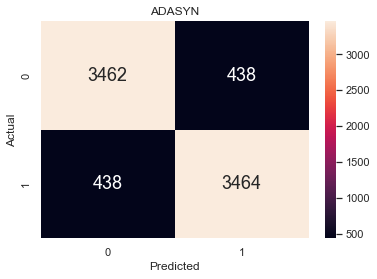

In [21]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree4.predict(x_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree4.score(x_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
accuracy = dectree4.score(x_train, y_train)
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.title('ADASYN')
plt.xlabel('Predicted')
plt.ylabel('Actual')

train_table = recmetrics(accuracy, tpTrain, fpTrain, tnTrain, fnTrain, train_table)

#### Predicting and analysing the Response using trained decision tree (Test)

Test Data
Accuracy  :	 0.860078277886497

TPR Test :	 0.5
TNR Test :	 0.8833333333333333

FPR Test :	 0.11666666666666667
FNR Test :	 0.5


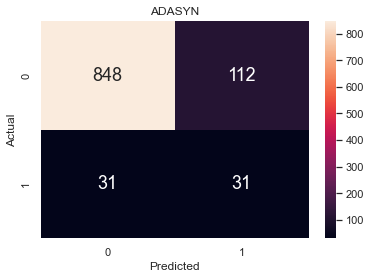

In [22]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree4.predict(x_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree4.score(x_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
accuracy = dectree4.score(x_train, y_train)
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.title('ADASYN')
plt.xlabel('Predicted')
plt.ylabel('Actual')

test_table = recmetrics(accuracy, tpTest, fpTest, tnTest, fnTest, test_table)

## Comparative Analysis of Performance Metrics

### Function for Visualisation

In [23]:
def visualisation(table, row, title):
    #Set Figure Size
    plt.figure(figsize=(8,7))
    
    #Set title of pyplot
    plt.title(title)
    
    #Set limit for y axis with maximum of 1
    plt.ylim([0,1])
    
    plots = sb.barplot(x = ['Random Sampling', 'SMOTE', 'SMOTEENN', 'ADASYN'], y = table.iloc[row,:])
    
    #Iterate over bars one by one
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.3f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=13, xytext=(0, 7),
                       textcoords='offset points')

    # Finally showing the plot
    plt.show()    

### Performance Metrics of Train data for different sampling methods

In [24]:
train_table = train_table.set_axis(['Random Sampling', 'SMOTE', 'SMOTEENN', 'ADASYN'], axis = 1)
train_table = train_table.set_axis(['Accuracy','Precision','Sensitivity', 'Specificity', 'F1-score'], axis = 0)
train_table

,Random Sampling,SMOTE,SMOTEENN,ADASYN
Accuracy,0.954490,0.818462,0.818917,0.887721
Precision,0.600000,0.798558,0.799519,0.887750
Sensitivity,0.016043,0.851795,0.851795,0.887750
Specificity,0.999487,0.785128,0.785971,0.887692
F1-score,0.031250,0.824318,0.824829,0.887750


#### Accuracy for train sets

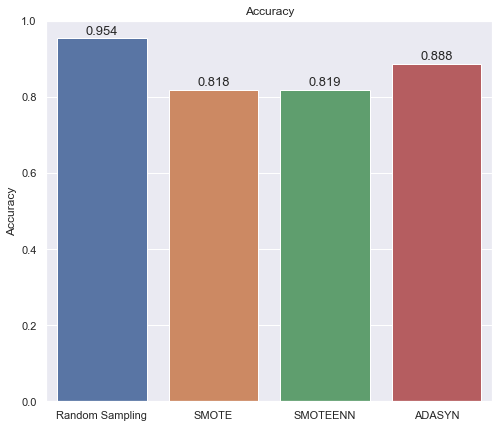

In [25]:
visualisation(train_table, 0, 'Accuracy')

#### Precision for train sets

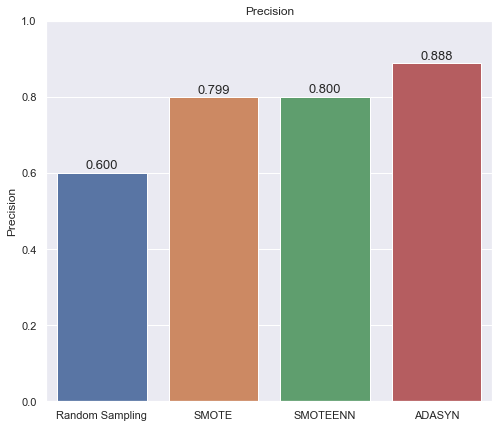

In [26]:
visualisation(train_table, 1, 'Precision')

#### Sensitivity for train sets

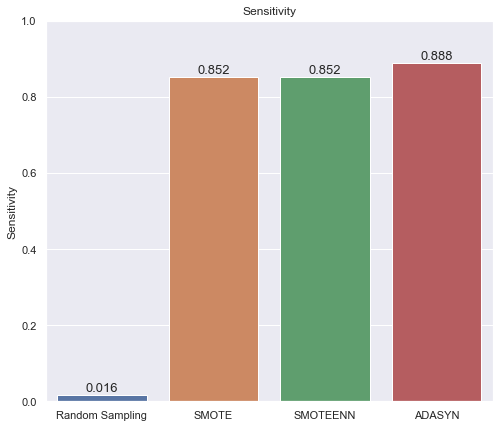

In [27]:
visualisation(train_table, 2, 'Sensitivity')

#### Specificity for train sets

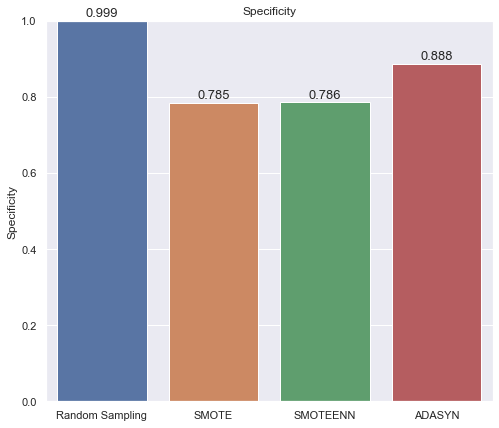

In [28]:
visualisation(train_table, 3, 'Specificity')

#### F1-Score for train sets

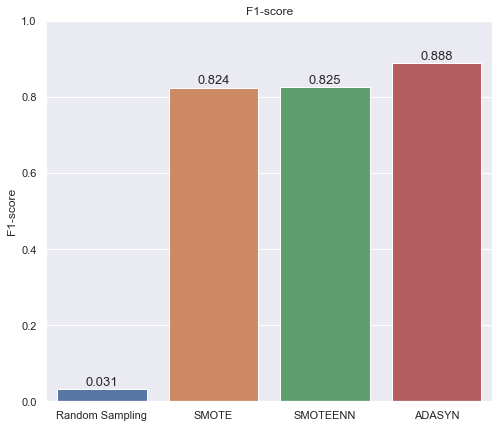

In [29]:
visualisation(train_table, 4, 'F1-score')

### Performance Metrics of Test data for different sampling methods

In [30]:
test_table = test_table.set_axis(['Random Sampling', 'SMOTE', 'SMOTEENN', 'ADASYN'], axis = 1)
test_table = test_table.set_axis(['Accuracy','Precision','Sensitivity', 'Specificity', 'f1_score'], axis = 0)
test_table

,Random Sampling,SMOTE,SMOTEENN,ADASYN
Accuracy,0.939335,0.770059,0.818917,0.887721
Precision,0.000000,0.166023,0.166023,0.216783
Sensitivity,0.000000,0.693548,0.693548,0.500000
Specificity,1.000000,0.775000,0.775000,0.883333
f1_score,0.000000,0.267913,0.267913,0.302439


#### Accuracy for test sets

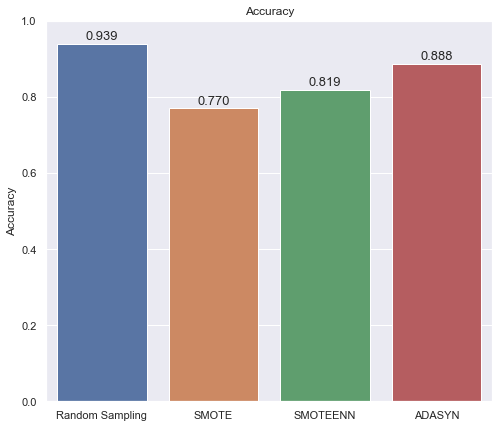

In [31]:
visualisation(test_table, 0, 'Accuracy')

#### Prediction for test sets

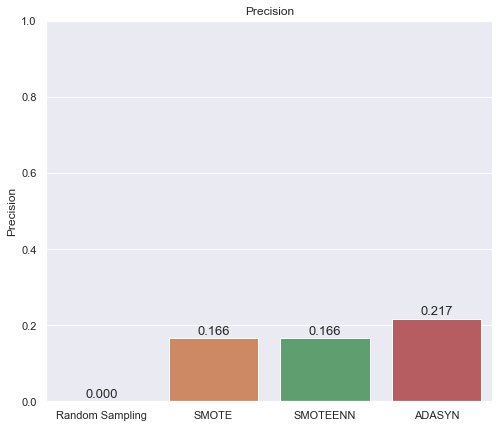

In [32]:
visualisation(test_table, 1, 'Precision')

#### Sensitivity for test sets

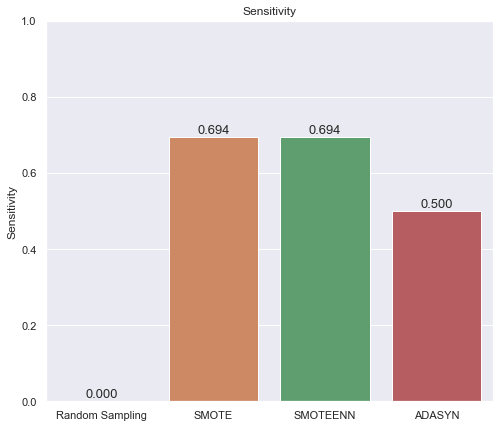

In [33]:
visualisation(test_table, 2, 'Sensitivity')

#### Specificity for test sets

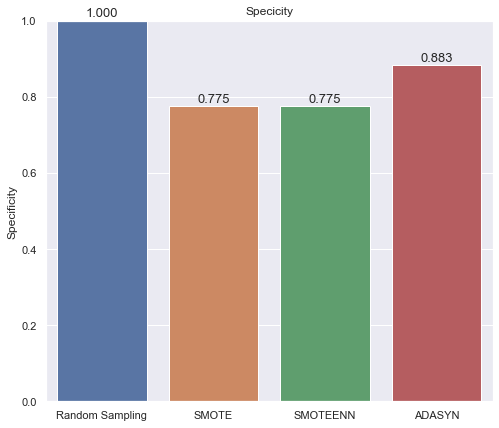

In [34]:
visualisation(test_table, 3, 'Specicity')

#### F1-Score for test sets

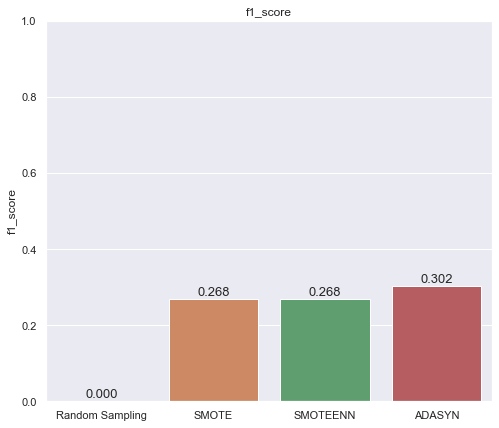

In [35]:
visualisation(test_table, 4, 'f1_score')

# Analysis of Results (Test)

In [36]:
test_table = test_table.set_axis(['Random Sampling', 'SMOTE', 'SMOTEENN', 'ADASYN'], axis = 1)
test_table = test_table.set_axis(['Accuracy','Precision','Sensitivity', 'Specificity', 'f1_score'], axis = 0)
test_table

,Random Sampling,SMOTE,SMOTEENN,ADASYN
Accuracy,0.939335,0.770059,0.818917,0.887721
Precision,0.000000,0.166023,0.166023,0.216783
Sensitivity,0.000000,0.693548,0.693548,0.500000
Specificity,1.000000,0.775000,0.775000,0.883333
f1_score,0.000000,0.267913,0.267913,0.302439


## Guide

- TP: People correctly predicted to have a stroke
- FP: People wrongly predicted to have a stroke
- TN: People correctly predicted not to have a stroke
- FN: People wrongly predicted not to have a stroke

## Accuracy

In [37]:
test_table.iloc[0].sort_values(ascending = False)

Random Sampling    0.939335
ADASYN             0.887721
SMOTEENN           0.818917
SMOTE              0.770059
Name: Accuracy, dtype: float64

**Formula:** <br>
`(TP + TN) / (TP + FP + FN + TP)`

**Results:**
- The `Randomly Sampling` data had the highest accuracy, followed by `ADASYN`, `SMOTE` and `SMOTEENN`.

**Explanation:**
- Ratio of correct predictions over total number of instances evaluated
- The high accuracy of the model from Random Sampling was likely due to the similarity of the Randomly Sampled data and the test data in terms of their proportion of Stroke : No Stroke data points.
- Thus, Random Sampling's high accuracy should not be taken too seriously

## Precision

In [38]:
test_table.iloc[1].sort_values(ascending = False)

ADASYN             0.216783
SMOTE              0.166023
SMOTEENN           0.166023
Random Sampling    0.000000
Name: Precision, dtype: float64

**Formula:**
`TP/(TP + FP)`

**Results**
- `ADASYN` had the highest value, followed by `SMOTE` and `SMOTEENN`, and finally `Random Sampling`.

**Explanation:**
- Fraction correctly identified as positive out of all predicted as positives
- Again, the decision tree from the randomly sampled data likely had skewed data favouring no stroke (negative values), resulting in the lower precision value for Random Sampling

## Sensitivity

In [39]:
test_table.iloc[2].sort_values(ascending = False)

SMOTE              0.693548
SMOTEENN           0.693548
ADASYN             0.500000
Random Sampling    0.000000
Name: Sensitivity, dtype: float64

**Formula:** <br>
`TP/(TP + FN)`

**Results:**
- SMOTE, SMOTEENN were the highest, closely followed by ADASYN, then the randomly sampled dataset which had a Sensitivity of 0.

**Explanation:**
- Fraction of positive values correctly predicted.
- Recommended for use where minority class is positive
- Sensitivity is an important measure, as people who were wrongly predicted not to have a stroke (FN) will suffer from serious health risks that go unnoticed.


## Specificity

In [40]:
test_table.iloc[3].sort_values(ascending = False)

Random Sampling    1.000000
ADASYN             0.883333
SMOTE              0.775000
SMOTEENN           0.775000
Name: Specificity, dtype: float64

**Formula:** <br>
`TN/(TN + TP)`

**Results:**
- `Randomly Sampling` data had the highest value, followed by `ADASYN`, then `SMOTE` and `SMOTEENN`.

**Explanation:**
- Also known as True Negative Rate
- Fraction of negative data points that are correctly predicted
- The model trained on Randomly Sampling data likely had high values due to its similarly imbalanced proportion with the test data, favouring negative data points (i.e no stroke).

## F1 Score

In [41]:
test_table.iloc[4].sort_values(ascending = False)

ADASYN             0.302439
SMOTE              0.267913
SMOTEENN           0.267913
Random Sampling    0.000000
Name: f1_score, dtype: float64

**Formula:** <br>
`2* (Precision*Recall)/(Precision + Recall)`

**Results**
- `ADASYN` had the highest value, then `SMOTE` and `SMOTEENN`, and finally
`Random Sampling`.

**Explanation:**
- Considers both precision and recall
- Weighted average of Precision and Recall
- Good F1 score means that we have low false positives and low false negatives
- More useful than accuracy, especially if you have an uneven class distribution

## Conclusion

Like our results from logistic regression, ADASYN was the highest for Precision and F1-Score, and the 2nd highest for Accuracy and Specificity. Thus, from our results, we reach the similar conclusion that ADASYN is the most effective sampling method among those used to train a reliable Decision Tree Model.

### References

https://medium.com/@dey.mallika/transform-your-graphs-with-seaborn-ea4fa8e606a6 <br>
https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/ <br>
https://www.xoriant.com/blog/product-engineering/decision-trees-machine-learning-algorithm.html#:~:text=Introduction%20Decision%20Trees%20are%20a,namely%20decision%20nodes%20and%20leaves.<br>
https://towardsdatascience.com/a-dive-into-decision-trees-a128923c9298#:~:text=A%20decision%20tree%20is%20a,dataset%20to%20the%20fullest%20purity.<br>
https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html<br>
https://www.analyticsvidhya.com/blog/2020/10/how-to-choose-evaluation-metrics-for-classification-model/<br>
https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/#:~:text=F1%20score%20%2D%20F1%20Score%20is,have%20an%20uneven%20class%20distribution.<br>
https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b<br>
https://towardsdatascience.com/understanding-evaluation-metrics-in-classification-modeling-6cc197950f01<br>